In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df=pd.read_csv('weatherAUS.csv')

In [163]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [164]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [165]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [166]:
df=df.drop(["Date","Evaporation", "Sunshine", "Cloud3pm", "Cloud9am","RISK_MM"], axis=1)

In [167]:
x=df.drop("RainTomorrow", axis=1)
y=df["RainTomorrow"]

In [168]:
y=y.values.reshape(-1,1)

In [169]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x=imputer.fit_transform(x)
y=imputer.fit_transform(y)

In [170]:
print(x)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 3.6 25.3 ... 10.9 24.5 'No']
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']]


In [171]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [172]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [173]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
x[:,0] = le1.fit_transform(x[:,0])
le2 = LabelEncoder()
x[:,4] = le2.fit_transform(x[:,4])
le3 = LabelEncoder()
x[:,6] = le3.fit_transform(x[:,6])
le4 = LabelEncoder()
x[:,7] = le4.fit_transform(x[:,7])
le5 = LabelEncoder()
x[:,-1] = le5.fit_transform(x[:,-1])
le6 = LabelEncoder()
y[:,-1] = le6.fit_transform(y[:,-1])

In [174]:
print(x)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 3.6 25.3 ... 10.9 24.5 0]
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]]


In [175]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [176]:

y = np.array(y,dtype=float)
print(y)


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [177]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [180]:
classifier.score(x_train,y_train)

0.999894509204072

In [181]:
y_pred = classifier.predict(x_test)

In [182]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [183]:
print(y_train)

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [184]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22098
         1.0       0.75      0.51      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

Confusion Matrix:
 [[21037  1061]
 [ 3127  3214]]


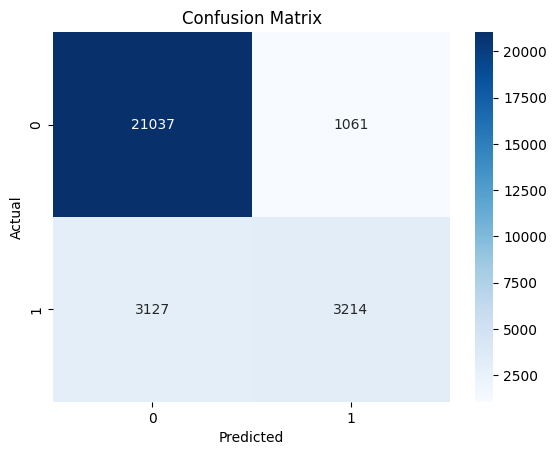

In [185]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()